# Linear regression

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [19]:
class LinearRegressionGD:
    def __init__(self, eta=0.01, random_state=1):
        self.eta = eta
        self.random_state = random_state

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        return self.net_input(X)
    
    def fit(self, X, y, n_iter=50):
        self.n_iter = n_iter
        np.random.seed(self.random_state)
        self.w_ = np.random.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.array([0.])
        self.losses_ = []

        for i in range(n_iter):
            output = self.net_input(X)
            errors = y - output
            self.w_ += self.eta *2 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

In [20]:
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']
df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt',
                 sep='\t',
                 usecols=columns)
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [21]:
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})
df = df.dropna(axis=0)

In [22]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
lr = LinearRegressionGD(eta=0.1)
lr.fit(X_std, y_std)

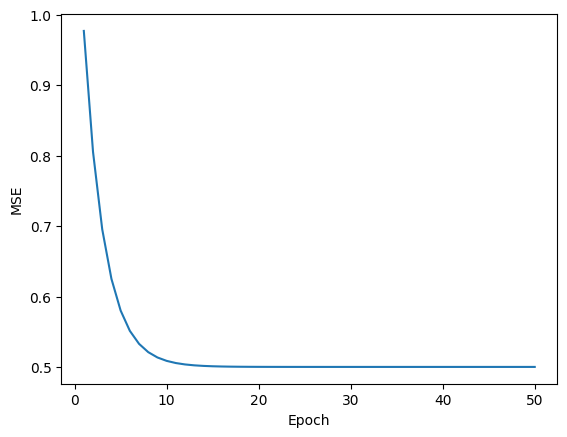

In [23]:
plt.plot(range(1, lr.n_iter+1), lr.losses_)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

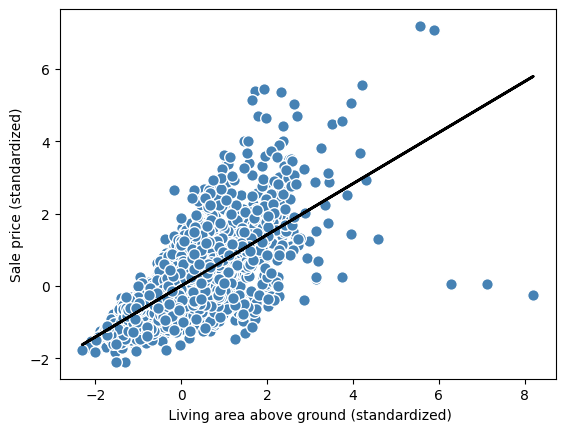

In [24]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)

lin_regplot(X_std, y_std, lr)
plt.xlabel(' Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')
plt.show()